# ACOM Tutorial Notebook - Basics

In this tutorial, you will learn the basic concepts and syntax of the ACOM module in py4DSTEM.  

### Acknowledgements

This tutorial notebook was written by Colin Ophus and Steven Zeltmann. Contact clophus@lbl.gov with any questions.

### Versioning

Last updated on 2022-01-13 with py4DSTEM v.0.12.6.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import py4DSTEM
import numpy as np

In [6]:
# Define titanium structure using manual input of the crystal structure
pos = np.array([
    [1/3, 2/3, 0.25],
    [2/3, 1/3, 0.75],
])

atom_num = 22

a = 2.95
c = 4.69
alpha = 90.0
gamma = 120.0

cell = [a,a,c,alpha,alpha,gamma]

crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

In [7]:
# # Import the titanium structure directly from The Material Project
# crystal = py4DSTEM.process.diffraction.Crystal.from_pymatgen_structure(
#     "mp-46",
# #     MP_key = "insert your own API key here!", 
# )

### Hexagonal indexing

The py4DSTEM ACOM module now supports hexagonal indexing (Miller-Bravais convention), which we will demonstrate here.

In [112]:
print(crystal.rational_ind(crystal.miller_to_hexagonal([1,0,0])), 
      crystal.rational_ind(crystal.miller_to_hexagonal([0,1,0])),
      crystal.rational_ind(crystal.miller_to_hexagonal([-1,-1,0])))

[ 2. -1. -1.  0.] [-1.  2. -1.  0.] [-1. -1.  2.  0.]


In [117]:
print(crystal.rational_ind(crystal.miller_to_hexagonal([1,2,0])), 
      crystal.rational_ind(crystal.miller_to_hexagonal([2,1,0])),
      crystal.rational_ind(crystal.miller_to_hexagonal([-1,1,0])))

[ 0.  1. -1.  0.] [ 1.  0. -1.  0.] [-1.  1.  0.  0.]


In [114]:
print(crystal.rational_ind(crystal.hexagonal_to_miller([2,-1,-1,0])), 
      crystal.rational_ind(crystal.hexagonal_to_miller([-1,2,-1,0])),
      crystal.rational_ind(crystal.hexagonal_to_miller([-1,-1,2,0])))

[1. 0. 0.] [0. 1. 0.] [-1. -1.  0.]


In [118]:
print(crystal.rational_ind(crystal.hexagonal_to_miller([0,1,-1,0])), 
      crystal.rational_ind(crystal.hexagonal_to_miller([1,0,-1,0])),
      crystal.rational_ind(crystal.hexagonal_to_miller([-1,1,0,0])))

[1. 2. 0.] [2. 1. 0.] [-1.  1.  0.]


In [129]:
# For arbitrary directions, the output crystallographic vectors may have large integer values:
print(crystal.rational_ind(crystal.miller_to_hexagonal([-0.22,0.79,0.13])))

[-41.  60. -19.  13.]


### Structure visualization

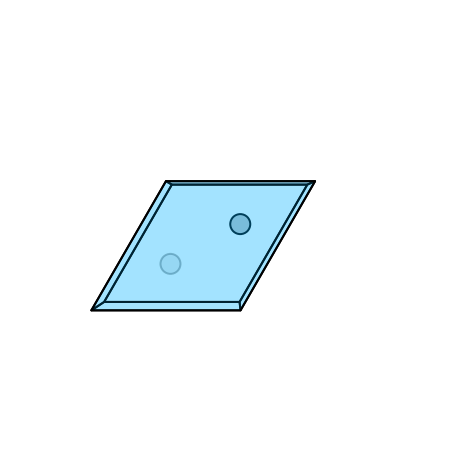

In [140]:
# Plot the structure
fig, ax = crystal.plot_structure(
    returnfig=True,
    proj_dir=[0,0,1],
)

In [141]:
# Save the structure plot
# fig.savefig('plot_00_atomic_struct.pdf')

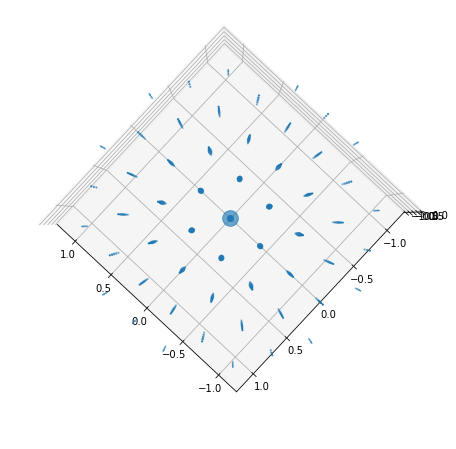

In [152]:
k_max = 1.5
crystal.calculate_structure_factors(k_max)

fig, ax = crystal.plot_structure_factors(
    proj_dir=[0.001,0,1],
    plot_limit=1.2,
    returnfig=True)

In [153]:
# Save the structure factor plot
# fig.savefig('plot_01_structure_factors.pdf')

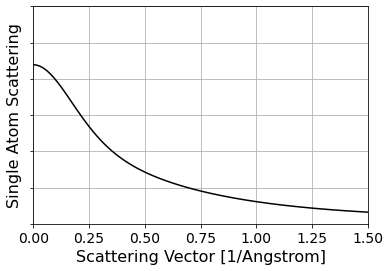

In [154]:
# plot the single atom scattering of Titanium
q = np.linspace(0,crystal.k_max,100)

atom_sf = py4DSTEM.process.utils.single_atom_scatter(
    [crystal.numbers[0]],
    [1],
    q,
    'A')
atom_sf.get_scattering_factor(
    [crystal.numbers[0]],
    [1],
    q,
    'A');

fig, ax = py4DSTEM.visualize.show_qprofile(
    q,
    intensity=atom_sf.fe,
    ymax=12,
    figsize=(6,4),
    returnfig=True)

ax.set_xlabel(
    'Scattering Vector [1/Angstrom]',
    size=16)
ax.set_ylabel(
    'Single Atom Scattering',
    size=16)
ax.set_xlim([0, crystal.k_max]);

In [155]:
# Save single atom scattering plot
# fig.savefig('plot_00b_single_atom_scattering.pdf')

### Generate and plot some diffraction patterns

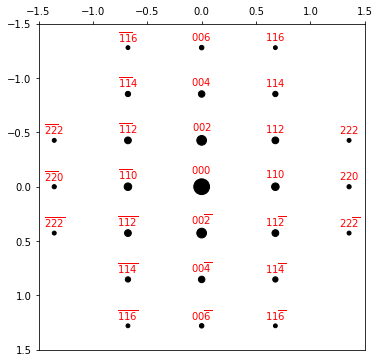

In [191]:
# zone_axis_test = [0,0,1]  # Zone axis

# 10-10 type zones
zone_axis_test = [1.0,-1.0,0.0]  # Zone axis
# zone_axis_test = [2.0,1.0,0.0]  # Zone axis
# zone_axis_test = [1.0,2.0,0.0]  # Zone axis

# 2-1-10 type zones
# zone_axis_test = [1.0,0.0,0.0]  # Zone axis
# zone_axis_test = [0.0,1.0,0.0]  # Zone axis
# zone_axis_test = [1.0,1.0,0.0]  # Zone axis

# zone_axis_test = [0,1,1]  # 1-213
# zone_axis_test = [0,2,1]  # -24-23
# zone_axis_test = [1,2,1]  # 01-11

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis = zone_axis_test,
    sigma_excitation_error=0.02,
#     tol_intensity=0,
)

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks,
    plot_range_kx_ky=[k_max,k_max],
    figsize=(6,6),
)

In [28]:
np.round(crystal.metric_real,decimals=3)

array([[10.878, -3.768,  0.   ],
       [-3.768,  6.527,  0.   ],
       [ 0.   ,  0.   , 21.996]])

In [ ]:
np.round(crystal.lat_inv,decimals=3)

In [ ]:
np.round((1/c**2)*crystal.lat_real[2,:],decimals=3)

In [123]:
# print(np.round(crystal.crystal_to_cartesian([1.0,1.0,0.0]),decimals=3))
# print(np.round(crystal.crystal_to_cartesian([2.0,-1.0,0.0]),decimals=3))
# print(np.round(crystal.crystal_to_cartesian([1.0,-2.0,0.0]),decimals=3))

In [124]:
# print(np.round(crystal.crystal_to_cartesian([1.0,0.0,0.0]),decimals=3))
# print(np.round(crystal.crystal_to_cartesian([0.0,1.0,0.0]),decimals=3))
# print(np.round(crystal.crystal_to_cartesian([1.0,-1.0,0.0]),decimals=3))

In [135]:
print(np.round(crystal.metric_real,decimals=3))

[[10.878 -3.768  0.   ]
 [-3.768  6.527  0.   ]
 [ 0.     0.    21.996]]


In [165]:
print(np.round(crystal.crystal_to_cartesian([1.0,-1.0,0.0]),decimals=3))
print(np.round(crystal.crystal_to_cartesian([2.0,1.0,0.0]),decimals=3))
print(np.round(crystal.crystal_to_cartesian([1.0,2.0,0.0]),decimals=3))

[ 0.866 -0.5    0.   ]
[0.866 0.5   0.   ]
[0. 1. 0.]


In [199]:
v0 = np.array([3,4,5])
v0 = v0 / np.linalg.norm(v0)
v1 = crystal.crystal_to_cartesian(v0)
v2 = crystal.cartesian_to_crystal(v1)
print(np.round(v0,decimals=3))
print(np.round(v2,decimals=3))

[0.424 0.566 0.707]
[0.424 0.566 0.707]


### Testing orientation matching

In [ ]:
# # Create an orientation plan
# crystal.orientation_plan(
#     angle_step_zone_axis = 2.0,
#     angle_step_in_plane = 2.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
# )

# Create an orientation plan with an automatic range of zone axes - this requires pymatgen to be installed!
crystal.orientation_plan(
    angle_step_zone_axis = 3.0,
    angle_step_in_plane = 2.0,
    accel_voltage = 300e3,
    corr_kernel_size=0.08,
    zone_axis_range='auto',
)

# # Create an orientation plan using a fiber texture 
# crystal.orientation_plan(
#     angle_step_zone_axis = 4.0,
#     angle_step_in_plane = 4.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
#     zone_axis_range='fiber',
#     fiber_axis=[0,0,1],
#     fiber_angles=[90,90]
# )

# Create an orientation plan with a manually specified range of zone axes
# crystal.orientation_plan(
#     angle_step_zone_axis = 4.0,
#     angle_step_in_plane = 4.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
#     zone_axis_range=np.array([
#         [0, 0, 1],
#         [0, 1, 0],
#         [1, 0, 0]])
# )

In [ ]:
# Plot the zone axes included in the orientation plan
fig, ax = crystal.plot_orientation_zones(
    plot_limit=np.array([-0.8, 0.8]),
    returnfig=True)

In [ ]:
# Save the zone axes orientation map
# fig.savefig('plot_02_zone_axes.pdf')

In [ ]:
# Plot some of the orientation plans
fig, ax = crystal.plot_orientation_plan(
#     zone_axis_plot=[3,0,1],
#     zone_axis_plot=[1,2,3],
    zone_axis_plot=[0,1,0],
    returnfig=True,
);

In [ ]:
# Save the zone axes orientation map
# fig.savefig('plot_03_plan_05.pdf')

In [ ]:
# Testing some matches - this cell shows the orientation correlogram, and the best match for both zone axis and in-plane rotation.
# zone_axis_test = np.array([0,0,1])
zone_axis_test = np.array([2,-1,0])

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis = zone_axis_test,
    sigma_excitation_error=0.02)

# Print out zone axes after normalization
t = np.round(zone_axis_test/np.linalg.norm(zone_axis_test)*1e3)/1e3
print('Input zone axis    = (' + str(t) + ')')

# Perform matching, and plot correlation images
orient, fig, ax = crystal.match_single_pattern(
    bragg_peaks,
    figsize=[16,8],
    plot_corr=True,
    verbose=True,
    returnfig=True,
)

In [ ]:
# Save the correlation outputs
# fig.savefig('plot_04_match_00.pdf')

In [ ]:
# py4DSTEM.process.diffraction.plot_diffraction_pattern?

In [ ]:
# Testing some matches, plot the best fit orientation over the input
# zone_axis_test = np.array([0,0,1])
# zone_axis_test = np.array([2,-1,0])
zone_axis_test = np.array([-1,1,0])

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis = zone_axis_test,
    sigma_excitation_error=0.02)

# Print out zone axes after normalization
t = np.round(zone_axis_test/np.linalg.norm(zone_axis_test), decimals=3)
print('Input zone axis    = (' + str(t) + ')')

# Perform matching
orientation = crystal.match_single_pattern(
    bragg_peaks,
    figsize=[16,8],
    verbose=True,
)

# plot the match overlaid onto the input data
bragg_peaks_fit = crystal.generate_diffraction_pattern(
    orientation,
    sigma_excitation_error=0.02)
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks_fit,
    bragg_peaks_compare=bragg_peaks,
    min_marker_size=100,
    plot_range_kx_ky=[k_max,k_max],
    figsize=(8,8)
)


In [ ]:
# Save the comparison plots
# fig.savefig('plot_05_comparison.pdf')

### Testing mean error of orientation plan

These further cells are for testing the mean error for a given orientation plan.  It uses the same zone axes as the orientation plan.

In [ ]:
def vector_angle(a: np.ndarray, b: np.ndarray) -> float:
    theta = np.arccos(np.clip((a @ b) / (np.linalg.norm(a) * np.linalg.norm(b)), -1.0, 1.0))
    if theta > np.pi/2:
        theta = np.pi - theta
    return theta

In [ ]:
test_orientations = crystal.orientation_vecs
test_patterns = py4DSTEM.io.datastructure.PointListArray(bragg_peaks.coordinates,(test_orientations.shape[0],1))

for i in range(test_orientations.shape[0]):
    test_patterns.get_pointlist(i,0).add_dataarray(crystal.generate_diffraction_pattern(
        zone_axis = test_orientations[i,:],
        sigma_excitation_error=0.02,
        proj_x_axis=[1,0,0]).data)
    
orientation_map = crystal.match_orientations(test_patterns)

In [ ]:
errors = np.zeros((test_orientations.shape[0],))
for i,t in enumerate(test_orientations):
    errors[i] = vector_angle(t,orientation_map.matrix[i,0,0,:,2])

print('Mean angle error = ' + str(np.round(np.mean(errors)*180/np.pi, decimals=3)) + ' degrees')
    
error_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
diff_intensity_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
n_spots_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
for a0 in np.arange(crystal.orientation_zone_axis_steps+1):
    inds = np.arange(a0*(a0+1)/2, a0*(a0+1)/2 + a0 + 1)
    inds_val = np.round(inds).astype('int')
    v = np.arange(a0+1)
    x_inds = a0 - v 
    y_inds = v
    inds1D = np.ravel_multi_index([x_inds,y_inds], error_img.shape)
    
    error_img.ravel()[inds1D] = errors[inds_val]
    error_img.ravel()[inds1D].mask = False
    
    diff_intensity_img[a0,range(a0+1)] = np.array([test_patterns.get_pointlist(i,0).data['intensity'].sum() for i in inds_val])
    diff_intensity_img[a0,range(a0+1)].mask = False
    
    n_spots_img[a0,range(a0+1)] = np.array([test_patterns.get_pointlist(i,0).data['intensity'].shape[0] for i in inds_val])
    n_spots_img[a0,range(a0+1)].mask = False

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
cm = plt.cm.get_cmap("inferno").copy()
cm.set_bad('w')
im = ax.imshow(np.rad2deg(error_img),cmap=cm,vmin=0,vmax=20)

label_0 = crystal.orientation_zone_axis_range[0,:]
label_0 = np.round(label_0 * 1e3) * 1e-3
label_0 /= np.min(np.abs(label_0[np.abs(label_0)>0]))

label_1 = crystal.orientation_zone_axis_range[1,:]
label_1 = np.round(label_1 * 1e3) * 1e-3
label_1 /= np.min(np.abs(label_1[np.abs(label_1)>0]))

label_2 = crystal.orientation_zone_axis_range[2,:]
label_2 = np.round(label_2 * 1e3) * 1e-3
label_2 /= np.min(np.abs(label_2[np.abs(label_2)>0]))

ax.set_yticks([crystal.orientation_zone_axis_steps])
ax.set_yticklabels([
    str(label_1)])

ax.set_xticks([0, crystal.orientation_zone_axis_steps])
ax.set_xticklabels([
    str(label_0),
    str(label_2)])
ax.xaxis.tick_top()

ax.set_title("Orientiation Error (°)")

fig.colorbar(im)
plt.show()

In [ ]:
# Save the correlation outputs
# fig.savefig('plot_11_errors_2deg_kmax_2p0_sigma_0p08.pdf')